In [19]:
import pandas as pd
import numpy as np

# read emoticon dataset
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("datasets/test/test_emoticon.csv")['input_emoticon'].tolist()

test_feat_X = np.load("datasets/test/test_feature.npz", allow_pickle=True)['features']


print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")


print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")


Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080

Test dataset size: 
test_emoticon_X: 2232


In [20]:
import pandas as pd
import numpy as np

# Read emoticon dataset
valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("datasets/test/test_emoticon.csv")['input_emoticon'].tolist()


print(f"Validation dataset size: ")
print(f"valid_emoticon_X: {len(valid_emoticon_X)} valid_emoticon_Y: {len(valid_emoticon_Y)}")


print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")



Validation dataset size: 
valid_emoticon_X: 489 valid_emoticon_Y: 489

Test dataset size: 
test_emoticon_X: 2232


In [21]:
from sklearn.preprocessing import LabelEncoder
# 4. Label Encoding for Emoticon Dataset
# Flatten emoticons (split each string into individual characters)
train_emoticon_X_flattened = [list(emoticon) for emoticon in train_emoticon_X]
test_emoticon_X_flattened = [list(emoticon) for emoticon in test_emoticon_X]

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode each emoticon character into integers for training data
train_emoticon_X_encoded = [label_encoder.fit_transform(emoticon) for emoticon in train_emoticon_X_flattened]
def safe_transform(emoticon, label_encoder):
    # Get the classes learned by the LabelEncoder
    known_classes = set(label_encoder.classes_)
    
    # Return transformed values, and map unseen labels to -1
    return np.array([label_encoder.transform([char])[0] if char in known_classes else -1 for char in emoticon])

# Apply safe transformation on the test data
test_emoticon_X_encoded = [safe_transform(emoticon, label_encoder) for emoticon in test_emoticon_X_flattened]
# Convert to NumPy arrays for model training
train_emoticon_X_encoded = np.array(train_emoticon_X_encoded)
# test_emoticon_X_encoded = np.array(test_emoticon_X_encoded)

# Verify that the emoticon data is encoded
print("\nSample Encoded Train Emoticon Data: ", train_emoticon_X_encoded[:2])
print("Sample Encoded Test Emoticon Data: ", test_emoticon_X_encoded[:2])

# Now, your datasets `train_emoticon_X_encoded`, `train_seq_X`, and `train_feat_X` are ready for training models.


Sample Encoded Train Emoticon Data:  [[2 9 4 0 3 5 6 8 1 7 0 6 3]
 [9 0 3 1 8 5 2 7 0 5 4 2 6]]
Sample Encoded Test Emoticon Data:  [array([ 9,  2,  0,  4,  8, -1, -1,  1,  5,  4, -1,  0,  2]), array([ 2, -1,  9, -1,  1,  4,  8,  0,  5,  2, -1,  0,  4])]


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 4. Label Encoding for Emoticon Dataset
# Flatten emoticons (split each string into individual characters)
valid_emoticon_X_flattened = [list(emoticon) for emoticon in valid_emoticon_X]

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode each emoticon character into integers for training data
valid_emoticon_X_encoded = [label_encoder.fit_transform(emoticon) for emoticon in valid_emoticon_X_flattened]

def safe_transform(emoticon, label_encoder):
    # Get the classes learned by the LabelEncoder
    known_classes = set(label_encoder.classes_)
    
    # Return transformed values, and map unseen labels to -1
    return np.array([label_encoder.transform([char])[0] if char in known_classes else -1 for char in emoticon])

# Apply safe transformation on the test data
test_emoticon_X_encoded = [safe_transform(emoticon, label_encoder) for emoticon in test_emoticon_X_flattened]

# Convert to NumPy arrays for model training
valid_emoticon_X_encoded = np.array(valid_emoticon_X_encoded)

# Verify that the emoticon data is encoded
print("\nSample Encoded Valid Emoticon Data: ", valid_emoticon_X_encoded[:2])
print("Sample Encoded Test Emoticon Data: ", test_emoticon_X_encoded[:2])

# Now, your datasets `valid_emoticon_X_encoded`, `valid_seq_X`, and `valid_feat_X` are ready for training models.



Sample Encoded Valid Emoticon Data:  [[8 2 1 0 3 7 4 9 5 0 3 4 6]
 [9 3 4 2 6 5 1 8 1 5 3 7 0]]
Sample Encoded Test Emoticon Data:  [array([ 9,  4,  2,  5,  8, -1, -1,  3,  6,  5, -1,  2,  4]), array([ 4, -1,  9, -1,  3,  5,  8,  2,  6,  4, -1,  2,  5])]


In [23]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize the TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=400)  # max_features limits the number of features

# # Fit and transform on the training text sequences
# train_seq_X_tfidf = tfidf_vectorizer.fit_transform(train_seq_X).toarray()

# # Transform the test text sequences
# test_seq_X_tfidf = tfidf_vectorizer.transform(test_seq_X).toarray()

# print(f"TF-IDF train shape: {train_seq_X_tfidf.shape}")
# print(f"TF-IDF test shape: {test_seq_X_tfidf.shape}")


In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize the TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=500)  # max_features limits the number of features

# Fit and transform on the training text sequences
# valid_seq_X_tfidf = tfidf_vectorizer.fit_transform(valid_seq_X).toarray()



# print(f"TF-IDF valid shape: {valid_seq_X_tfidf.shape}")
# print(f"TF-IDF test shape: {test_seq_X_tfidf.shape}")


In [25]:
# train_feat_X_flattened = train_feat_X.reshape(train_feat_X.shape[0], -1)  # Shape will be (7080, 13 * 768)
# test_feat_X_flattened = test_feat_X.reshape(test_feat_X.shape[0], -1)  # Adjust for test set


In [26]:
# valid_feat_X_flattened = valid_feat_X.reshape(valid_feat_X.shape[0], -1) 

In [27]:
print(f"train_emoticon_X_encoded shape: {train_emoticon_X_encoded.shape}")
# print(f"train_seq_X_tfidf shape: {train_seq_X_tfidf.shape}")
# print(f"train_feat_X shape: {train_feat_X.shape}")
print(f"valid_emoticon_X_encoded shape: {valid_emoticon_X_encoded.shape}")
# print(f"valid_seq_X_tfidf shape: {valid_seq_X_tfidf.shape}")
# print(f"valid_feat_X shape: {valid_feat_X.shape}")

train_emoticon_X_encoded shape: (7080, 13)
valid_emoticon_X_encoded shape: (489, 13)


In [28]:
print(f"Emoticon training data shape: {train_emoticon_X_encoded.shape}")
# print(f"Sequence training data shape: {train_seq_X_tfidf.shape}")
# print(f"Feature training data shape: {train_feat_X_flattened.shape}")
print(f"Emoticon valid data shape: {valid_emoticon_X_encoded.shape}")
# print(f"Sequence valid data shape: {valid_seq_X_tfidf.shape}")
# print(f"Feature valid data shape: {valid_feat_X_flattened.shape}")


Emoticon training data shape: (7080, 13)
Emoticon valid data shape: (489, 13)


In [29]:
# Combine all features for training
# train_X_combined = np.hstack([train_emoticon_X_encoded, train_seq_X_tfidf, train_feat_X_flattened])

# # Combine all features for testing
# test_X_combined = np.hstack([test_emoticon_X_encoded, test_seq_X_tfidf, test_feat_X_flattened])

# print(f"Combined train shape: {train_X_combined.shape}")  # Should be (7080, 10497)
# print(f"Combined test shape: {test_X_combined.shape}")
train_X_combined=train_emoticon_X_encoded


In [30]:
# valid_X_combined = np.hstack([valid_emoticon_X_encoded, valid_seq_X_tfidf, valid_feat_X_flattened])
valid_X_combined = valid_emoticon_X_encoded
print(f"Combined valid shape: {valid_X_combined.shape}") 

Combined valid shape: (489, 13)


In [31]:
print(len(train_emoticon_Y))
# print(len(train_feat_Y))
print(len(valid_emoticon_Y))
# print(len(valid_feat_Y))

7080
489


In [32]:
print(f"Train combined shape: {train_X_combined.shape}")
print(f"Valid combined shape: {valid_X_combined.shape}")


Train combined shape: (7080, 13)
Valid combined shape: (489, 13)


In [33]:
test_emoticon_df = pd.read_csv("datasets/test/test_emoticon.csv")
# test_emoticon_Y= test_emoticon_df['label'].tolist()


In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Standardize the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X_combined)
valid_X_scaled = scaler.transform(valid_X_combined)

# Step 2: Define a function to perform feature selection and train SVM with different C and kernel
def select_features_and_train_svm(k, C, kernel, train_X, train_Y, valid_X, valid_Y):
    # Select top k features
    selector = SelectKBest(score_func=f_classif, k=k)
    train_X_selected = selector.fit_transform(train_X, train_Y)
    valid_X_selected = selector.transform(valid_X)
    
    # Train SVM with specified C and kernel
    svm = SVC(C=C, kernel=kernel, random_state=42)  # Regularization parameter C and kernel
    svm.fit(train_X_selected, train_Y)
    
    # Make predictions on the validation set
    valid_predictions = svm.predict(valid_X_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(valid_Y, valid_predictions)
    
    return accuracy, selector.get_support(indices=True)

# Step 3: Iterate over different values of k, C, and kernel and find the best combination
best_k = None
best_C = None
best_kernel = None
best_accuracy = 0
best_features = None

# Define the values of k, C, and kernel to try
k_values = range(1, train_X_scaled.shape[1]+1, 2)  # Feature selection steps
C_values = [0.1, 1, 10]  # Different regularization values
kernels = ['linear', 'rbf', 'poly']  # Different kernel types

# Iterate through all combinations of k, C, and kernel
for k in k_values:
    for C in C_values:
        for kernel in kernels:
            accuracy, selected_features = select_features_and_train_svm(k, C, kernel, train_X_scaled, train_emoticon_Y, valid_X_scaled, valid_emoticon_Y)
            
            print(f"k={k}, C={C}, kernel={kernel} - Validation Accuracy: {accuracy * 100:.2f}%")
            
            # Update the best combination if current accuracy is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
                best_C = C
                best_kernel = kernel
                best_features = selected_features

# Output the best combination found
print(f"\nBest combination:")
print(f"k={best_k}, C={best_C}, kernel={best_kernel} with Validation Accuracy: {best_accuracy * 100:.2f}%")
print(f"Selected feature indices for k={best_k}: {best_features}")


k=1, C=0.1, kernel=linear - Validation Accuracy: 50.51%
k=1, C=0.1, kernel=rbf - Validation Accuracy: 48.88%
k=1, C=0.1, kernel=poly - Validation Accuracy: 50.72%
k=1, C=1, kernel=linear - Validation Accuracy: 50.51%
k=1, C=1, kernel=rbf - Validation Accuracy: 48.88%
k=1, C=1, kernel=poly - Validation Accuracy: 50.72%
k=1, C=10, kernel=linear - Validation Accuracy: 50.51%
k=1, C=10, kernel=rbf - Validation Accuracy: 48.88%
k=1, C=10, kernel=poly - Validation Accuracy: 50.72%
k=3, C=0.1, kernel=linear - Validation Accuracy: 49.08%
k=3, C=0.1, kernel=rbf - Validation Accuracy: 53.58%
k=3, C=0.1, kernel=poly - Validation Accuracy: 51.74%
k=3, C=1, kernel=linear - Validation Accuracy: 49.08%
k=3, C=1, kernel=rbf - Validation Accuracy: 53.58%
k=3, C=1, kernel=poly - Validation Accuracy: 51.94%
k=3, C=10, kernel=linear - Validation Accuracy: 49.28%
k=3, C=10, kernel=rbf - Validation Accuracy: 52.56%
k=3, C=10, kernel=poly - Validation Accuracy: 51.94%
k=5, C=0.1, kernel=linear - Validation A

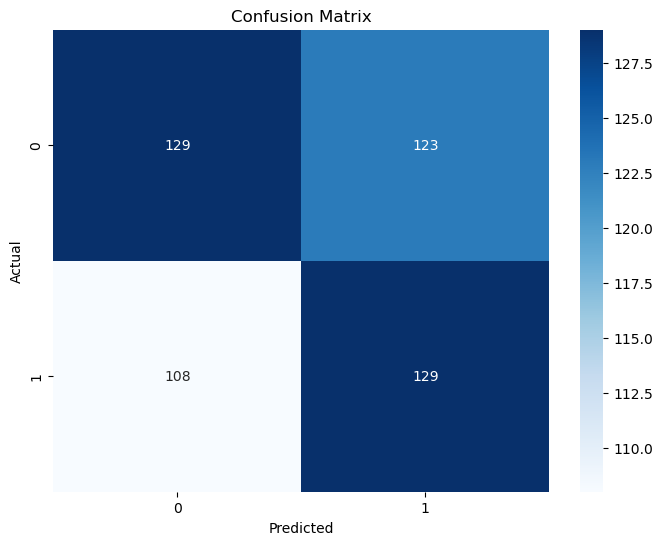

In [47]:

# Step 6: Visualize Confusion Matrix (Optional) 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(valid_emoticon_Y, valid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(valid_emoticon_Y), yticklabels=np.unique(valid_emoticon_Y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





In [48]:
print(valid_Y)
print(valid_predictions)

[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 